# TASK

group task for applying Three different classifiers on the *fashion_mnist* dataset and comparing amongst the three and pick the best accurate classifier from the three.

> Aditya Anilkumar
















# IMPORTING THE DRIVE AND LIBRARIES

In [ ]:
# Importing the libraries and importing the drive for using the dataset
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# LOADING THE DATASET

In [ ]:
#loading the dataset
data = pd.read_csv('/content/drive/MyDrive/CA2-ML/fashion_mnist.csv')
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data['label'].value_counts() # counting the values accordance with the frequency of corresponding variables

0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: label, dtype: int64

In [ ]:
data.info() # extracting the overall information of the  dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [ ]:
#checking for null values
np.any(np.isnan(data))

False

In [ ]:
#cheking for data infinity
np.any(np.isfinite(data))

True

In [ ]:
#logistic Regression
#Splitting into train and test arrays vectors
x = data.drop('label', axis=1)
y = data['label']

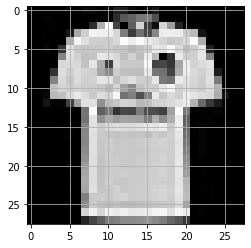

In [ ]:
# plotting from the training dataset
x_data = x.values
plt.imshow(np.reshape(x_data[0],(28,28)),cmap = 'gray')
plt.grid();

In [ ]:
#splitting into the train test and test split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=1)

# 1. Logistic Regression Applied to the train and test and prediction of the accuracy of the model

In [ ]:
#logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_train_log = logreg.predict(X_train)
y_pred_test_log = logreg.predict(X_test)

In [ ]:
#Predicting the accuracy
acc_training_log = accuracy_score(y_train, y_pred_train_log)
#acc_training_log = f1_score(y_train, y_pred_train_log, average='weighted') #F1_score accuracy measure
acc_test_log = accuracy_score(y_test, y_pred_test_log)
#acc_test_log = f1_score(y_test, y_pred_test_log, average='weighted') #F1_score accuracy measure
acc_training_log, acc_test_log

(0.9072857142857143, 0.826)

F1_accuracy is dropping the accuracy percentile by 0.1.%3f so its safe to consider the normal accuracy prediciton parameters.

# 2. Decision Tree Classifier


In [ ]:
#Trainning and Predicting using Decision Tree Classifier
#making decision tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_train_dec_tree = dec_tree.predict(X_train)
y_pred_test_dec_tree = dec_tree.predict(X_test)


In [ ]:
#checkin the accuracy
#predicting the accuracy
from sklearn.metrics import f1_score
#acc_train_dec_tree = accuracy_score(y_train, y_pred_train_dec_tree)
acc_train_dec_tree = f1_score(y_train, y_pred_train_dec_tree, average='micro') #predicting the accuracy using the F1 score for train test
#acc_test_dec_tree = accuracy_score(y_test, y_pred_test_dec_tree)
acc_test_dec_tree = f1_score(y_test, y_pred_test_dec_tree, average='micro') # predictiong the accuracy using the F1 Score technique
acc_train_dec_tree, acc_test_dec_tree

(1.0, 0.7506666666666667)

# 3. Random Forest Classifier

In [ ]:
#Starting the Forest Classifier
#Training the random forest classifier using random forest classifer
ran_for = RandomForestClassifier()
ran_for.fit(X_train, y_train)
y_pred_train_ran_for = ran_for.predict(X_train)
y_pred_test_ran_for = ran_for.predict(X_test)

In [ ]:
#checking the accuracy of Random Forest Classifier
acc_train_ran_for = accuracy_score(y_train, y_pred_train_ran_for)
#acc_train_ran_for = f1_score(y_train, y_pred_train_ran_for, average='weighted')
acc_test_ran_for = accuracy_score(y_test, y_pred_test_ran_for)
#acc_test_ran_for = f1_score(y_test, y_pred_test_ran_for, average='weighted')
acc_train_ran_for, acc_test_ran_for

(1.0, 0.8503333333333334)

Since accuracy score has been dropping by 0.111 %.3f by implementating the F1_score accuracy method so we swithced back to the normal accuracy score counting measures.

#4. Application of AdaBoost Classifier with cross validation Technique

In [ ]:
# declaring seed for defination of random state
seed = 1
n_trees = 50


In [ ]:
#creating kFold Cross Validation Object
kfcv = KFold(n_splits=5, shuffle=True, random_state=seed)
abc = AdaBoostClassifier(n_estimators=n_trees, random_state=seed)
cv_abc = cross_val_score(abc, x, y, cv=kfcv)

# Adaboost Classifier Cross validation score
cv_abc

array([0.383 , 0.3625, 0.3055, 0.3605, 0.36  ])

In [ ]:
cv_abc.mean()

0.3543

Total Accuracies of the above various models


*   Logistic Regression - 83%
*   Decision Tree Classifier - 76%
*   Random Forest Classifier - 86%
*   AdaBoost Classifer with cross Validation - 35%

We can safely concur that Random Forest Classifier has the highest accuracy of all the 4 classifier used.

